# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откроем файл с данными и изучим общую информацию

**Описание данных**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd #подключим библиотеку pandas для работы с данными
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv','\t') #прочитаем данные из файла в переменную data
print(data.info()) #узнаем общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

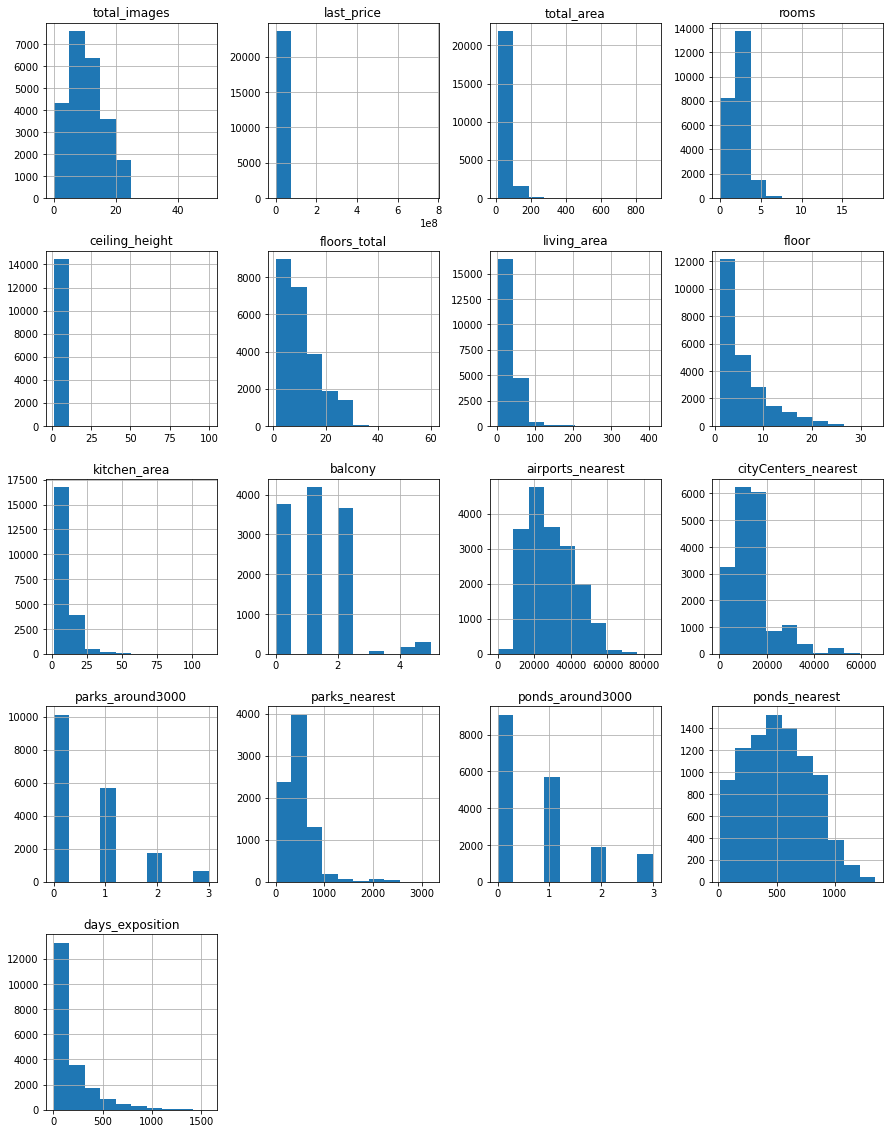

In [2]:
data.hist(figsize=(15, 20)) #построим гистограмму для всех числовых столбцов таблицы на одном графике

In [3]:
data.head(10) #посмотрим первые 10 записей данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# выведем столбцы, где есть пропущенные значения 
for column in data.columns:
    if data[column].count() != data.shape[0]:
        print(f'В {column} пропущенных строк: {data.shape[0] - data[column].count()}, {round(((data[column].isnull().sum())/data.shape[0])*100, 2)}%')

В ceiling_height пропущенных строк: 9195, 38.8%
В floors_total пропущенных строк: 86, 0.36%
В living_area пропущенных строк: 1903, 8.03%
В is_apartment пропущенных строк: 20924, 88.29%
В kitchen_area пропущенных строк: 2278, 9.61%
В balcony пропущенных строк: 11519, 48.61%
В locality_name пропущенных строк: 49, 0.21%
В airports_nearest пропущенных строк: 5542, 23.38%
В cityCenters_nearest пропущенных строк: 5519, 23.29%
В parks_around3000 пропущенных строк: 5518, 23.28%
В parks_nearest пропущенных строк: 15620, 65.91%
В ponds_around3000 пропущенных строк: 5518, 23.28%
В ponds_nearest пропущенных строк: 14589, 61.56%
В days_exposition пропущенных строк: 3181, 13.42%


### Выполним предобработку данных

В данных есть проблемы: пропуски, дубликаты, типы данных. Избавимся от проблем, для этого выполним предобработку данных

In [5]:
good_data = data #сохраним исходные данные

#### ceiling_height

пропущенных строк: 9195, 38.8%

In [6]:
#возможно, высота потолков зависит от типа дома
#посчитаем медианные значения для каждого этажа
print(good_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median'))

              ceiling_height
floors_total                
1.0                     2.80
2.0                     2.70
3.0                     2.80
4.0                     3.00
5.0                     2.55
6.0                     3.00
7.0                     3.00
8.0                     2.80
9.0                     2.55
10.0                    2.60
11.0                    2.75
12.0                    2.65
13.0                    2.70
14.0                    2.60
15.0                    2.70
16.0                    2.70
17.0                    2.70
18.0                    2.70
19.0                    2.75
20.0                    2.75
21.0                    2.70
22.0                    2.75
23.0                    2.75
24.0                    2.75
25.0                    2.75
26.0                    2.66
27.0                    2.70
28.0                    2.60
29.0                    2.60
34.0                    2.65
35.0                    2.70
36.0                   14.85
37.0          

обнаружили возможную ошибку в данных: на 36ом этаже медианное значение высоты потолка 14.85
посмотрим на данные 

In [7]:
good_data.query('floors_total == 36.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,NaN,...,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.7,36.0,40.0,29,NaN,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


In [8]:
good_data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [9]:
#скорее всего в данных неверно указан разделитель, поэтому для всех значений больше 10 заменим значения
good_data.loc[good_data['ceiling_height'] > 10, 'ceiling_height'] = good_data['ceiling_height']/10
good_data.query('ceiling_height > 10') #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [10]:
print(good_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')) #проверим после изменения

#посчитаем среднее значения для каждого этажа
print(good_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='mean'))

              ceiling_height
floors_total                
1.0                     2.80
2.0                     2.70
3.0                     2.80
4.0                     3.00
5.0                     2.55
6.0                     3.00
7.0                     3.00
8.0                     2.80
9.0                     2.55
10.0                    2.60
11.0                    2.75
12.0                    2.65
13.0                    2.70
14.0                    2.60
15.0                    2.70
16.0                    2.70
17.0                    2.70
18.0                    2.70
19.0                    2.75
20.0                    2.75
21.0                    2.70
22.0                    2.75
23.0                    2.75
24.0                    2.75
25.0                    2.75
26.0                    2.66
27.0                    2.70
28.0                    2.60
29.0                    2.60
34.0                    2.65
35.0                    2.70
36.0                    2.70
37.0          

In [11]:
#проверим есть ли строки, где указана высота потолка меньше 2.4м
good_data.query('ceiling_height < 2.4') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13T00:00:00,2,2.30,9.0,28.400000,8,False,...,7.00,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5498,17,2200000.0,56.00,2018-04-02T00:00:00,2,2.30,5.0,45.000000,1,NaN,...,9.00,2.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.500000,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.200000,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
12755,2,1400000.0,22.50,2017-09-21T00:00:00,1,2.20,2.0,18.000000,2,NaN,...,4.50,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [12]:
#заменим пропуски средним значением для каждого этажа
group_floors_total = good_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['mean']) 
group_floors_total.columns = ['mean'] 
group_floors_total = group_floors_total.round(2)
for floor in group_floors_total.index:
    good_data.loc[(good_data['ceiling_height'].isna()) & (good_data['floors_total'] == floor), 'ceiling_height'] = group_floors_total.loc[floor, 'mean']

In [13]:
#заменим значение <2.4 медианным значением для каждого этажа
good_data.loc[good_data['ceiling_height'] < 2.4, 'ceiling_height'] = good_data['ceiling_height'].median()   
#заменим пропуски медианным значением для каждого этажа
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(good_data['ceiling_height'].median())

In [14]:
good_data['ceiling_height'].isna().sum() #проверим данные после преобразований

0

#### floors_total

пропущенных строк: 86, 0.36%

*значение "всего этажей" может быть критичным при выборе, поэтому пропуски в этом столбце нельзя заменять другим значеним, поэтому удалим строки с пропусками

In [15]:
good_data.dropna(axis=0, subset=['floors_total'], inplace=True)
good_data['floors_total'].isna().sum() #проверим, что не осталось пустых значений

0

#### living_area

пропущенных строк: 1903, 8.03%

In [16]:
good_data.query('living_area.isnull()', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.64,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.74,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.58,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.73,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.58,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [17]:
# Код ревьюера
good_data['total_area'].corr(good_data['living_area'])

0.9397704889780099

In [18]:
#найдем медиану общей площади
mean_total_area = good_data['total_area'].median()

#найдем медиану жилой площади
mean_living_area = good_data['living_area'].median()

#найдем отношение k (коэффициент)
k = mean_total_area/mean_living_area

#заполним пропуски в столбце living_area отношением общей площади к найденному соотношению
good_data['living_area'] = good_data['total_area']/k
good_data['living_area'].isna().sum() #проверим, что не осталось пустых значений

0

#### is_apartment 

пропущенных строк: 20924, 88.29%

In [19]:
good_data['is_apartment'].unique() #посмотрим какие значения есть

array([nan, False, True], dtype=object)

In [20]:
# Считаем, что пропуски возникли из-за того, что люди не знают, 
#что такое аппартаменты или это не аппартаменты, соответственно, пропуски можно заменить на False
good_data['is_apartment'] = good_data['is_apartment'].fillna(False) # заменим пропуски в столце is_apartment на False
good_data['is_apartment'].isna().sum() #проверим, что в столбце is_apartment не осталось пропусков

0

In [21]:
#исправим тип данных
good_data['is_apartment'] = good_data['is_apartment'].astype(bool)

#### kitchen_area

пропущенных строк: 2278, 9.61%

In [22]:
#исправим тип данных
good_data['kitchen_area'] = good_data['kitchen_area'].astype(float)

In [23]:
#найдем медиану общей площади
mean_total_area = good_data['total_area'].median()

#найдем медиану жилой площади
mean_living_area = good_data['kitchen_area'].median()

#найдем отношение k (коэффициент)
k = mean_total_area/mean_living_area

#заполним пропуски в столбце living_area отношением общей площади к найденному соотношению
good_data['kitchen_area'] = good_data['total_area']/k
good_data['kitchen_area'].isna().sum() #проверим, что не осталось пустых значений

0

#### balcony

In [24]:
#В balcony пропущенных строк: 11519, 48.61%
#Считаем, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет
good_data['balcony'] = good_data['balcony'].fillna(0) # заменим пропуски в столце balcony числом 0
good_data['balcony'].isna().sum() #проверим, что в столбце balcony не осталось пропусков

0

#### locality_name

пропущенных строк: 49, 0.21%

In [25]:
#посмотрим где и какие значения пропущены у locality_name и где не пустое cityCenters_nearest
good_data[['locality_name', 'cityCenters_nearest']].query('locality_name.isna() and cityCenters_nearest.isna() == False').head()

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0
4151,NaN,3902.0


In [28]:
#удалим 8 строк с пустыми значениями
good_data.dropna(axis=0, subset=['locality_name'], inplace=True)
good_data['locality_name'].isna().sum() #проверим, что не осталось пустых значений

0

In [29]:
array_locality_name = good_data['locality_name'].unique()
array_locality_name.sort()
print(array_locality_name)

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [30]:
#в столбце есть неявные дубли, избавимся от них
good_data['locality_name'] = (good_data['locality_name'].str.replace('ё', 'е'))
good_data['locality_name'] = (good_data['locality_name'].replace(['поселок городского типа','городской поселок'], 'пгт', regex=True))
good_data['locality_name'] = (good_data['locality_name'].replace(['садоводческое некоммерческое товарищество','садовое товарищество'], 'снт', regex=True))    
good_data['locality_name'] = (good_data['locality_name'].replace(['снт Рахья'], 'пгт Рахья', regex=True)) 
good_data['locality_name'] = (good_data['locality_name'].replace(['поселок Мурино'], 'Мурино', regex=True)) 
good_data['locality_name'] = (good_data['locality_name'].replace(['деревня Кудрово'], 'Кудрово', regex=True)) 
good_data['locality_name'] = (good_data['locality_name'].replace(['поселок станции','поселок при железнодорожной станции'], 'поселок при жд станции', regex=True))

Возможные причины проблем с данными в столбце locality_name - на сайте поле строковое,т.е. пользователь сам заполняет, а не адресный классификатор; отсутствие обязательности заполнения данного поля.

#### airports_nearest

пропущенных строк: 5542, 23.38%

* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

In [31]:
#посмотрим для каких locality_name пропущены значения airports_nearest
good_data[['locality_name', 'airports_nearest']].query('airports_nearest.isna()').head()

,locality_name,airports_nearest
5,пгт Янино-1,NaN
8,Мурино,NaN
12,Сертолово,NaN
22,Кудрово,NaN
30,Коммунар,NaN


In [32]:
#зная расстояние до Пулково для указанных населенных пунктах, заполним пропуски
good_data.loc[(good_data['locality_name'] == 'пгт Янино-1') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 32000
good_data.loc[(good_data['locality_name'] == 'Мурино') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 42400
good_data.loc[(good_data['locality_name'] == 'Сертолово') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 61700
good_data.loc[(good_data['locality_name'] == 'Кудрово') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 29000
good_data.loc[(good_data['locality_name'] == 'Коммунар') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 38900
good_data.loc[(good_data['locality_name'] == 'Гатчина') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 30700
good_data.loc[(good_data['locality_name'] == 'Выборг') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 150000
good_data.loc[(good_data['locality_name'] == 'деревня Федоровское') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 34000
good_data.loc[(good_data['locality_name'] == 'пгт Красный Бор') & (good_data['airports_nearest'].isna()), 'airports_nearest'] = 32900

#### cityCenters_nearest

пропущенных строк: 5519, 23.29%

* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

#### parks_around3000 

пропущенных строк: 5500, 23.3%
* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

#### ponds_around3000

пропущенных строк: 5518, 23.28%

* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

#### parks_nearest

пропущенных строк: 15620, 65.91%

* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

#### ponds_nearest

пропущенных строк: 14589, 61.56%

* данные получены автоматически из геосервисов, скорее всего техническая ошибка при выгрузке данных. Они критичны, поэтому пропуски заполнять средними/медианными значениями нельзя. Оставим как есть.

#### days_exposition

пропущенных строк: 3181, 13.42%


In [33]:
#исследуем данные в столбце, чтобы решить, что делать с пропусками
good_data['days_exposition'].min() #найдем минимальное значение

1.0

In [34]:
good_data['days_exposition'].max() #найдем максимальное значение

1580.0

In [35]:
good_data['days_exposition'].mean() #найдем медианное значение

180.7413945278023

т.к. разброс очень большой, то заменим пропущенные значения на 0 и будем анализировать в дальнейшем 

In [36]:
#good_data['days_exposition'] = good_data['days_exposition'].fillna(0)
#good_data['days_exposition'].isna().sum() 

In [37]:
good_data[['days_exposition', 'last_price', 'first_day_exposition']].query('days_exposition.isna()').head(10)

,days_exposition,last_price,first_day_exposition
0,NaN,13000000.0,2019-03-07T00:00:00
7,NaN,7915000.0,2019-04-18T00:00:00
44,NaN,5350000.0,2018-11-18T00:00:00
45,NaN,5200000.0,2018-12-02T00:00:00
46,NaN,6600000.0,2019-01-31T00:00:00
49,NaN,3050000.0,2018-11-22T00:00:00
52,NaN,11795000.0,2017-09-22T00:00:00
71,NaN,4850000.0,2019-03-27T00:00:00
81,NaN,10949000.0,2018-12-27T00:00:00
84,NaN,2400000.0,2019-03-13T00:00:00


In [38]:
# код ревьюера
import datetime as dt

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_year'] = data['first_day_exposition'].dt.year
data[data['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


#### first_day_exposition

In [39]:
# изменим тип и отображение даты 
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format = '%Y-%m-%d')
good_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,62.307692,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019
1,7,3350000.0,40.4,2018-12-04,1,2.78,11.0,23.307692,1,False,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018
2,10,5196000.0,56.0,2015-08-20,2,2.71,5.0,32.307692,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015
3,0,64900000.0,159.0,2015-07-24,3,2.64,14.0,91.730769,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,57.692308,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018


In [40]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [41]:
# выведем столбцы, где есть пропущенные значения 
for column in good_data.columns:
    if good_data[column].count() != good_data.shape[0]:
        print(f'В {column} пропущенных строк: {good_data.shape[0] - good_data[column].count()}, {round(((good_data[column].isnull().sum())/good_data.shape[0])*100, 2)}%')

В airports_nearest пропущенных строк: 3609, 15.32%
В cityCenters_nearest пропущенных строк: 5501, 23.34%
В parks_around3000 пропущенных строк: 5500, 23.34%
В parks_nearest пропущенных строк: 15535, 65.92%
В ponds_around3000 пропущенных строк: 5500, 23.34%
В ponds_nearest пропущенных строк: 14529, 61.65%
В days_exposition пропущенных строк: 3171, 13.46%


Вывод: выполнена предобработка данных - убраны дубли, заполнены пропуски (где возможно), исправлены типы данных для 
first_day_exposition  (было object, стало float64) и is_apartment (было object, стало bool)

* до обработки:
В ceiling_height пропущенных строк: 9195, 38.8%
В floors_total пропущенных строк: 86, 0.36%
В living_area пропущенных строк: 1903, 8.03%
В is_apartment пропущенных строк: 20924, 88.29%
В kitchen_area пропущенных строк: 2278, 9.61%
В balcony пропущенных строк: 11519, 48.61%
В locality_name пропущенных строк: 49, 0.21%
В airports_nearest пропущенных строк: 5542, 23.38%
В cityCenters_nearest пропущенных строк: 5519, 23.29%
В parks_around3000 пропущенных строк: 5518, 23.28%
В parks_nearest пропущенных строк: 15620, 65.91%
В ponds_around3000 пропущенных строк: 5518, 23.28%
В ponds_nearest пропущенных строк: 14589, 61.56%
В days_exposition пропущенных строк: 3181, 13.42%

* после обработки:
В airports_nearest пропущенных строк: 3609, 15.29%
В cityCenters_nearest пропущенных строк: 5501, 23.3%
В parks_around3000 пропущенных строк: 5500, 23.3%
В parks_nearest пропущенных строк: 15560, 65.92%
В ponds_around3000 пропущенных строк: 5500, 23.3%
В ponds_nearest пропущенных строк: 14544, 61.61%

### Добавим в таблицу новые столбцы

In [42]:
#цена одного квадратного метра
good_data['price_per_m2'] = good_data['last_price'] / good_data['total_area']                         

In [43]:
#день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
good_data['day_first_day'] = pd.DatetimeIndex(good_data['first_day_exposition']).weekday 

In [44]:
#месяц публикации объявления
good_data['month_first_day'] = pd.DatetimeIndex(good_data['first_day_exposition']).month

In [45]:
#год публикации объявления
good_data['year_first_day'] = pd.DatetimeIndex(good_data['first_day_exposition']).year

In [46]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
good_data['type_of_floor'] = good_data['floor'].where(good_data['floor'] != 1, 'первый')
good_data.loc[good_data['floor'] == good_data['floors_total'], 'type_of_floor'] = 'последний'
good_data.loc[(good_data['type_of_floor'] != 'первый') & (good_data['type_of_floor'] != 'последний'), 'type_of_floor'] = 'другой'

In [47]:
#расстояние до центра города в километрах
good_data['cityCenters_nearest_km'] =  round(good_data['cityCenters_nearest']/1000, 0)

In [48]:
good_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,price_per_m2,day_first_day,month_first_day,year_first_day,type_of_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,62.307692,8,False,...,2.0,755.0,NaN,2019,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.78,11.0,23.307692,1,False,...,0.0,NaN,81.0,2018,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.71,5.0,32.307692,4,False,...,2.0,574.0,558.0,2015,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.64,14.0,91.730769,9,False,...,3.0,234.0,424.0,2015,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,57.692308,13,False,...,1.0,48.0,121.0,2018,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучим параметры

 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - тип этажа квартиры («первый», «последний», «другой»);
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего парка.

<AxesSubplot:>

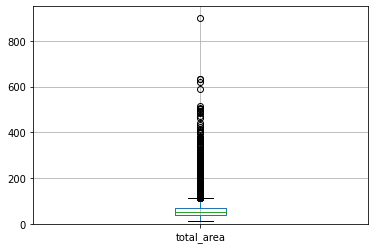

In [49]:
#общая площадь  total_area
plt.ylim(0, 950) 
good_data.boxplot(column='total_area') 

<AxesSubplot:ylabel='Frequency'>

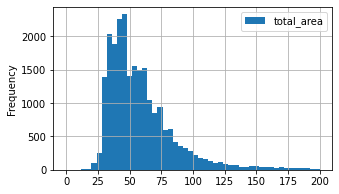

In [50]:
#уберем выбросы
good_data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,200))

Большая часть недвижимости имеет площадь от 26 до 75 квадратных метра

<AxesSubplot:>

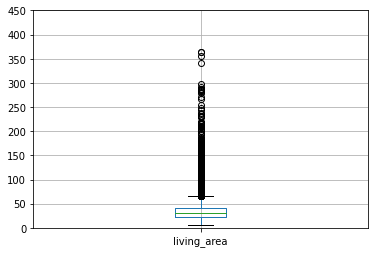

In [51]:
#living_area жилая площадь
plt.ylim(0, 450) 
good_data.boxplot(column='living_area') 

<AxesSubplot:ylabel='Frequency'>

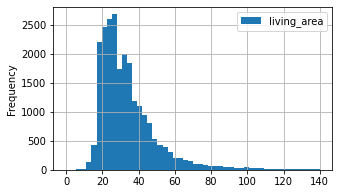

In [52]:
#уберем выбросы
good_data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0, 140))

Большая часть недвижимости имеет жилую площадь от 16 до 45 квадратных метра

<AxesSubplot:>

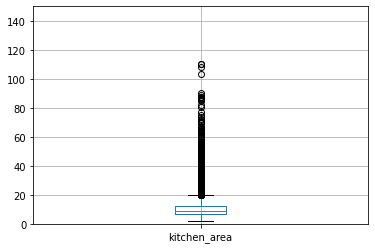

In [53]:
#kitchen_area площадь кухни
plt.ylim(0, 150) 
good_data.boxplot(column='kitchen_area') 

<AxesSubplot:ylabel='Frequency'>

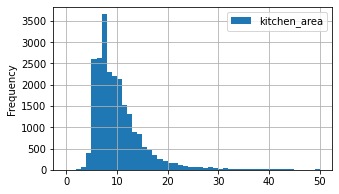

In [54]:
#уберем выбросы
good_data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0, 50))

Большая часть недвижимости имеет площадь кухни от 5 до 15 квадратных метра

<AxesSubplot:>

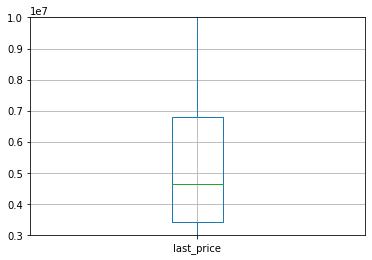

In [55]:
#last_price цена объекта
plt.ylim(3000000, 10000000) 
good_data.boxplot(column='last_price') 

Большая часть недвижимости имеет стоимость от 4,5 млн до 7 млн

<AxesSubplot:>

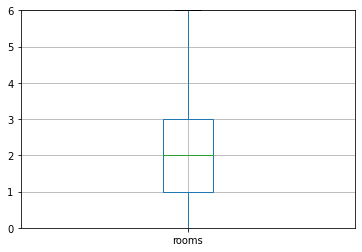

In [56]:
#rooms количество комнат
plt.ylim(0, 6) 
good_data.boxplot(column='rooms') 

У большинства объектов недвижимости, выставленных на продажу, две комнаты

<AxesSubplot:>

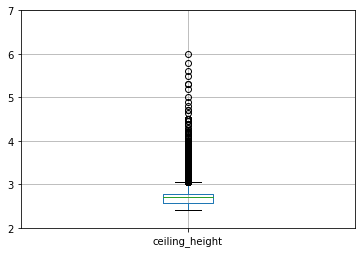

In [57]:
#ceiling_height высота потолков
plt.ylim(2, 7) 
good_data.boxplot(column='ceiling_height') 

<AxesSubplot:ylabel='Frequency'>

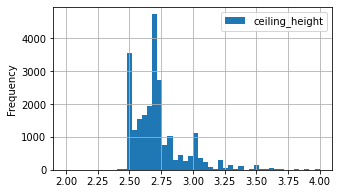

In [58]:
#уберем выбросы
good_data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (2, 4))

Большинство объектов недвижимости имеют высоту потолков около 2,6 метров

In [59]:
#type_of_floor тип этажа квартиры («первый», «последний», «другой»)
print(good_data.groupby('type_of_floor')['type_of_floor'].count())

type_of_floor
другой       17326
первый        2884
последний     3355
Name: type_of_floor, dtype: int64


<AxesSubplot:>

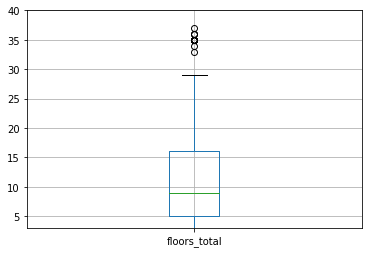

In [60]:
#floors_total общее количество этажей в доме
plt.ylim(3, 40) 
good_data.boxplot(column='floors_total') 

<AxesSubplot:ylabel='Frequency'>

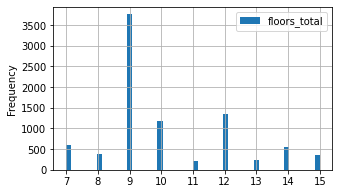

In [61]:
good_data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (7, 15))

Большая часть продаваемой недвижимости имеет общее количество этажей - 9

<AxesSubplot:>

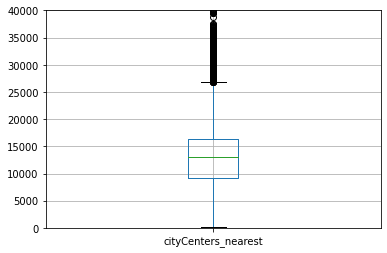

In [62]:
#cityCenters_nearest расстояние до центра города в метрах
plt.ylim(0, 40000) 
good_data.boxplot(column='cityCenters_nearest') 

<AxesSubplot:ylabel='Frequency'>

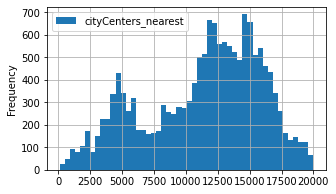

In [63]:
good_data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (100, 20000))

Большая часть недвижимости расположена на расстоянии от 10 км до 15 км

<AxesSubplot:>

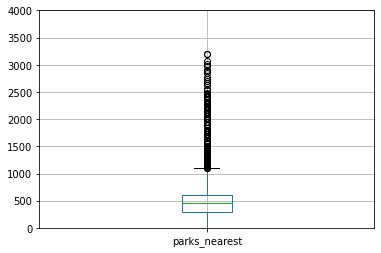

In [64]:
#parks_nearest расстояние до ближайшего парка
plt.ylim(0, 4000) 
good_data.boxplot(column='parks_nearest') 

<AxesSubplot:ylabel='Frequency'>

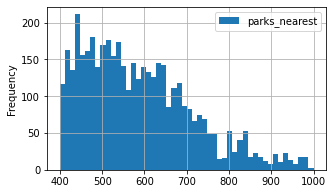

In [65]:
good_data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (400, 1000))

Большая часть объектов недвижимости имеет в радиусе до 500 метров ближайший парк

#### Изучим как быстро продавались квартиры

<AxesSubplot:>

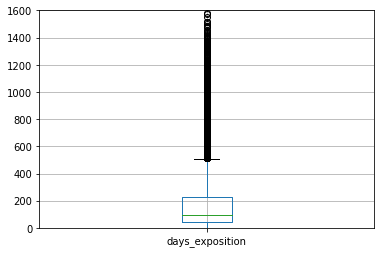

In [66]:
#построим гистограмму
plt.ylim(0, 1600)
good_data.boxplot(column='days_exposition')

<AxesSubplot:ylabel='Frequency'>

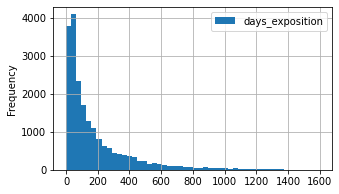

In [67]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,1600))

In [68]:
#рассчитаем среднее и медиану
print(f"Медиана {good_data['days_exposition'].median()}")
print(f"Среднее {round(good_data['days_exposition'].mean(), 2)}")

Медиана 95.0
Среднее 180.74


<AxesSubplot:ylabel='Frequency'>

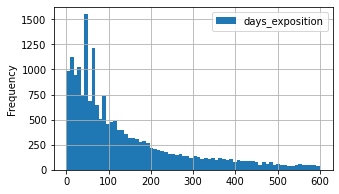

In [69]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,600))

<AxesSubplot:ylabel='Frequency'>

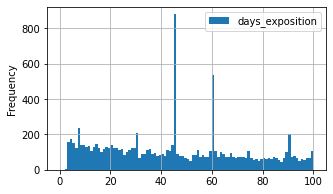

In [70]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))

<AxesSubplot:ylabel='Frequency'>

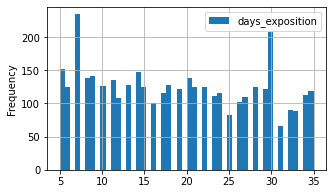

In [71]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (5,35))

<AxesSubplot:ylabel='Frequency'>

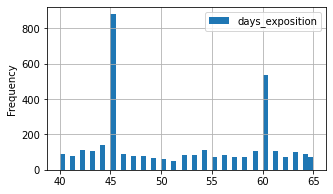

In [72]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (40,65))

<AxesSubplot:ylabel='Frequency'>

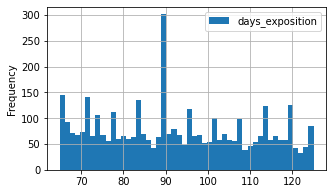

In [73]:
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (65,125))

**Вывод:** обычно продажа недвижимости занимаем около трех месяцев (90 дней).
продажи недвижимости менее, чем за 45 дней можно считать быстрыми.
продажи недвижимости более, чем за 300 дней можно считать необычно долгими.

Для более точного анализа необходимы данные о том, были ли повторные публикации, автопубликации, автоснятие по истечению срока публикации, а также изменение цены.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

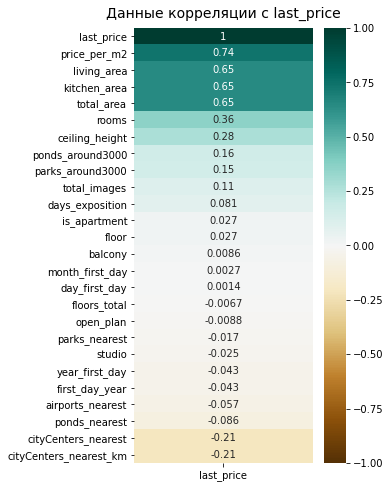

In [74]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(good_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Данные корреляции с last_price', fontdict={'fontsize':14}, pad=10);

In [75]:
#влияние общей площади на стоимость объекта недвижимости
good_data['total_area'].corr(good_data['last_price'])

0.6536213939252808

In [76]:
#влияние жилой площади на стоимость объекта недвижимости
good_data['living_area'].corr(good_data['last_price'])

0.6536213939252804

In [77]:
#влияние площади кухни на стоимость объекта недвижимости
good_data['kitchen_area'].corr(good_data['last_price'])

0.6536213939252806

In [78]:
#влияние количества комнат на стоимость объекта недвижимости
good_data['rooms'].corr(good_data['last_price'])

0.3631905485065752

In [79]:
#влияние типа этажа на стоимость объекта недвижимости
good_data['floor'].corr(good_data['last_price'])

0.026841775356835604

In [80]:
#влияние дата размещения (день недели, месяц, год) на стоимость объекта недвижимости
good_data['day_first_day'].corr(good_data['last_price']) #день

0.0013569211122710745

In [81]:
good_data['month_first_day'].corr(good_data['last_price']) #месяц

0.0027259571647347564

In [82]:
good_data['year_first_day'].corr(good_data['last_price']) #год

-0.04286415271361106

На стоимость объекта недвижимости влияет прямопропорционально площадь квартиры, количество комнат и этаж. Обратнопропорционально влияет удаленность от центра.
Стоимость объекта недвижимости зависит от совокупности нескольких параметров.

<AxesSubplot:xlabel='total_area'>

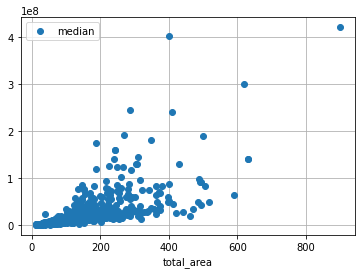

In [83]:
#зависимость цены от площади (точечная диаграмма)
tot_area_vs_price = good_data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
tot_area_vs_price.columns = ['mean', 'median', 'count']
tot_area_vs_price.plot(y = 'median', style = 'o', grid=True)

In [84]:
#sns.set(style = 'ticks', color_codes = True)
#sns.pairplot(good_data)
#plt.show()

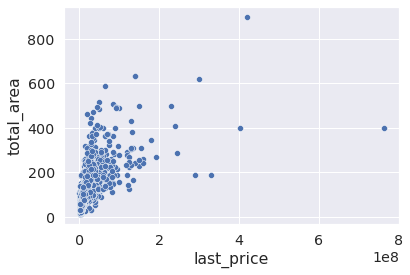

In [85]:
sns.set(font_scale=1.3)
sns.scatterplot(x='last_price', y='total_area', data=good_data)
plt.xlabel('last_price')
plt.ylabel('total_area')
plt.show()

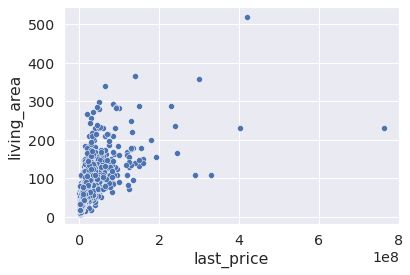

In [86]:
sns.set(font_scale=1.3)
sns.scatterplot(x='last_price', y='living_area', data=good_data)
plt.xlabel('last_price')
plt.ylabel('living_area')
plt.show()

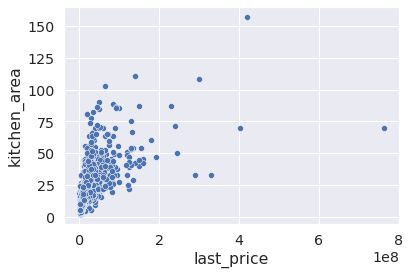

In [87]:
sns.set(font_scale=1.3)
sns.scatterplot(x='last_price', y='kitchen_area', data=good_data)
plt.xlabel('last_price')
plt.ylabel('kitchen_area')
plt.show()

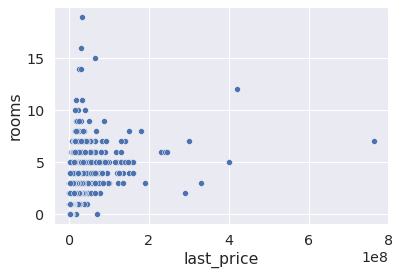

In [88]:
sns.set(font_scale=1.3)
sns.scatterplot(x='last_price', y='rooms', data=good_data)
plt.xlabel('last_price')
plt.ylabel('rooms')
plt.show()

(4450000.0, 4750000.0)

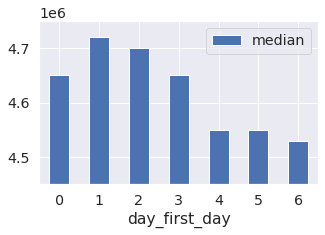

In [89]:
#зависимость стоимости от дня недели
days_vs_price = good_data.pivot_table(index = 'day_first_day', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price.columns = ['mean', 'median', 'count']
days_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4450000, 4750000)

**Вывод:** объекты недвижимости с наибольшей стоимостью публикуются в понедельник, самые дешевые - в пятницу и субботу.

(4470000.0, 4850000.0)

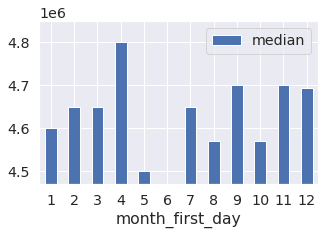

In [90]:
#зависимость стоимости от месяца
days_vs_price = good_data.pivot_table(index = 'month_first_day', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price.columns = ['mean', 'median', 'count']
days_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4470000, 4850000)

**Вывод:** объекты недвижимости с наибольшей стоимостью публикуются в апреле, самые дешевые - в мае.

(4470000.0, 5600000.0)

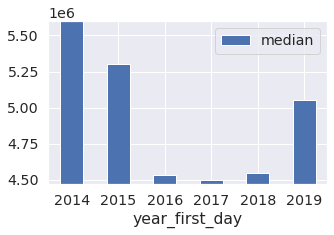

In [91]:
#зависимость стоимости от года
days_vs_price = good_data.pivot_table(index = 'year_first_day', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price.columns = ['mean', 'median', 'count']
days_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4470000, 5600000)

**Вывод:** объекты недвижимости с наибольшей стоимостью были опубликованы в 2014 г., самые дешевые - в 2017 г.

(1000000.0, 5000000.0)

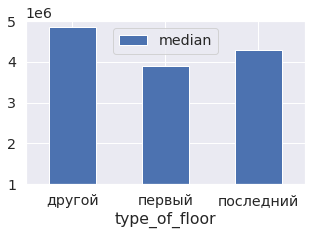

In [92]:
#зависимость стоимости от типа этажа
days_vs_price = good_data.pivot_table(index = 'type_of_floor', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price.columns = ['mean', 'median', 'count']
days_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(1000000, 5000000)

**Вывод:** объекты недвижимости с наибольшей стоимостью располагаются не на крайних этажах, самые дешевые - на первом этаже.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [93]:
# сделаем сводную таблицу
local_vs_sq_price = good_data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = ['mean', 'count'])
local_vs_sq_price.columns = ['avg_price_per_m2', 'count']
local_vs_sq_price['avg_price_per_m2'] = round((local_vs_sq_price['avg_price_per_m2'] / 1000), 2)
print(local_vs_sq_price.sort_values('count', ascending = False).head(10))

                   avg_price_per_m2  count
locality_name                             
Санкт-Петербург              114.87  15651
Мурино                        86.04    586
Кудрово                       95.26    470
поселок Шушары                78.55    439
Всеволожск                    68.65    398
Пушкин                       103.13    369
Колпино                       75.42    338
поселок Парголово             90.18    327
Гатчина                       68.75    307
Выборг                        58.14    237


In [94]:
print(local_vs_sq_price.sort_values('count').head(10))

                       avg_price_per_m2  count
locality_name                                 
снт Садко                         32.14      1
деревня Терпилицы                 38.03      1
деревня Тихковицы                 21.13      1
деревня Каськово                  37.00      1
деревня Тойворово                 33.01      1
деревня Трубников Бор             37.52      1
деревня Иссад                     34.85      1
деревня Хапо-Ое                   55.88      1
деревня Зимитицы                  31.90      1
деревня Хязельки                  47.83      1


**Вывод:** выделены населённые пункты с самой высокой (г. Санкт-Петербург) и самой низкой стоимостью квадратного метра (снт Садко)

#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра

(0.0, 20.0)

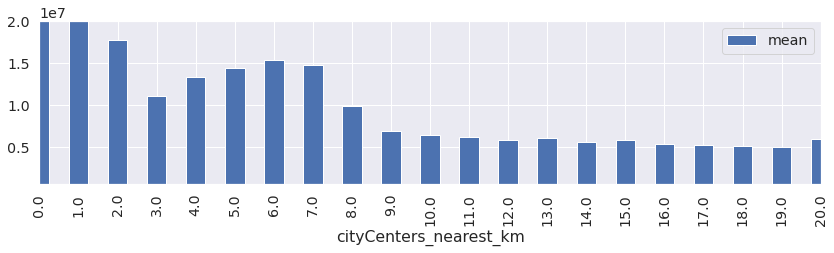

In [95]:
#сделаем выборку только по г. Санкт-Петербург
array_spb = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km.isna() == False and last_price.isna() == False')

#сделаем сводную таблицу и вычислим среднюю стоимость на разном удалении от центра
array_spb = array_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
array_spb.columns = ['mean']
array_spb['mean'] = round(array_spb['mean'], 1)
#построим гистограмму типа bar для визуализации изменения средней цены для каждого километра от центра Петербурга
array_spb.plot(y = 'mean', kind = 'bar', figsize = (14,3), grid=True)
plt.ylim(600000, 20000000)
plt.xlim(0, 20)



In [96]:
print(array_spb.sort_values('mean').head(10))

                             mean
cityCenters_nearest_km           
24.0                    3854429.6
26.0                    4014287.0
25.0                    4052839.9
29.0                    4236666.7
23.0                    4985376.5
28.0                    5026428.6
19.0                    5051410.0
18.0                    5091331.3
17.0                    5299495.9
16.0                    5373130.6


In [97]:
print(array_spb.sort_values('mean', ascending = False).head(10))

                              mean
cityCenters_nearest_km            
0.0                     31449115.9
1.0                     21206720.8
2.0                     17788319.6
6.0                     15338418.4
7.0                     14775152.6
5.0                     14455995.6
4.0                     13304279.5
3.0                     11137394.7
8.0                      9949111.4
27.0                     8300000.0


**Вывод:** учтён каждый километр расстояния, рассчитаны средние цены квартир для каждого км расстояния от центра города.
Стоимость объекта зависит от расстояния до центра города следующим образом: в радиусе до 8км цена значительно выше (центр города), однако, стоимость квартир на расстоянии 3 км самая дешевая в центре. Можно, предположить, что это связано с тем, что фонд недвижимости в этом районе вторичен и дома(ремонт) не в лучшем состоянии.

### Напишите общий вывод

#### **Цель проекта:** 
определить рыночную стоимость объектов недвижимости 

#### **Задачи проекта:**
* провести исследовательский анализ данных
* установить параметры, влияющие на цену объектов
* параметры, позволяющие ослеживать мошенников

#### **Описание результатов проекта:**

В рамках проекта были проанализированные данные по продажам объектов недвижимости. Первая часть данных была заполнена пользователем, вторая — получена автоматически на основе картографических данных.
В ходе исследования были найдены проблемы в первоначальных данных: пропуски, дубликаты, неверные типы данных.
Ошибки могли возникнуть как при ручном вводе части данных пользователем, так и технические ошибки при выгрузке.

**Рекомендации: на сайте публикации объявлений о продаже необходимо предусмотреть обязательность полей заполнения и выбор из классификаторов.**

Самая дорогая стоимость объекта недвижимости - в Санкт-Петербурге, самая дешевая - в деревне Старополье.

При этом стоимость выше, чем ближе к центру города. Есть зависимость от площадей, количества комнат, высоты потолков и типа этажа. Однако, строгой зависимости нет и можно сделать вывод, что стоимость объекта недвижимости зависит от совокупности параметров.

Самые дорогие (в центре) объекты недвижимости имеют параметры: площадь от 50 до 75 кв., 3 комнаты, высота потолков выше трех метров.

Большим спросом пользуются объекты недвижимости, расположенные не на крайних этажах.

Среднее время продажи объектов недвижиости в центре выше (90 дней), чем в области (от 45 до 60 дней).


Параметры, которые можно выделить для отслеживания деятельности мошенников: а

* общая площадь меньше 6 кв.м и/или больше 200 кв.м
* жилая площадь меньше 6 кв.м
* площадь кухни (если она есть) меньше 5 кв.м
* высота потолков ниже 2.4 или выше 4 м
* количество комнат больше 7
* время публикации объявления меньше 30 дней (очень быстрые продажи) или больше 450 дней (долго)